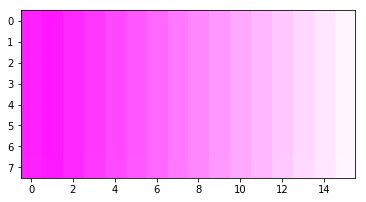

In [39]:
import numpy as np
import skimage.io
import os
import random
from matplotlib import pylab
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

filename = 'C:/Users/Ashley/Documents/GitHub/image-rgb-in-3D/gradientbox.png'
img = skimage.io.imread( filename )
plt.imshow(img)

height, width, depth = img.shape
# print(img.shape)
# np.meshgrid( width, height )
# print(np.meshgrid(width, height))
# imageArray = np.append( np.meshgrid( width, height ), img )
# print(imageArray)


heightAr = list(range(0, height))
# print(heightAr)
widthAr = list(range(0, width))
# print(widthAr)
meshGrid = np.meshgrid(widthAr, heightAr)
imageArray = np.concatenate((meshGrid[0][:, :, None], meshGrid[1][:, :, None], img), axis = 2)
# print(imageArray[0, 2])
# print(imageArray.shape)

# reshaped is the input for the plane-fitting
reshaped = imageArray.reshape(width * height, -1)
# print(reshaped)

# prints out the channel that is wanted with the xy coordinates
def getChannel(imageArray, channel):
    xyc = [0, 1, channel]
    return imageArray[:, xyc]

# channel constants
r = 2
g = 3
b = 4
a = 5

In [56]:
# create empty 3D array for A, B, C
ABC = np.zeros([3, 3, 3]) # probably need to change the size
print(ABC)


# f(x,y) = Ax + By + C
#xyc is a pixel with xy coordinates and one channel (r, g, b, or a)
# used for finding the error of the individual point/channel
def checkPlane(xyc, model): # [x, y, c] 
#     f(x,y) = Ax + By + C = [x1, y1, 1] * [A, B, C]T
    p = [xyc[0], xyc[1], 1]
#     unk = numpy.array([A, B, C])
    return xyc[2] - numpy.dot(p, model.transpose()) # c - Ax + By + C



# iterate through the picture
for x in range(0, len(widthAr)):
    for y in range(0, len(heightAr)):
        neighbors = []
        topLeft = (x - 1, y - 1)
        neighbors.append(topLeft)
        topMid = (x, y - 1)
        neighbors.append(topMid)
        topRight = (x + 1, y - 1)
        neighbors.append(topRight)
        left = (x - 1, y)
        neighbors.append(left)
        right = (x + 1, y)
        neighbors.append(right)
        botLeft = (x + 1, y + 1)
        neighbors.append(botLeft)
        botMid = (x + 1, y + 1)
        neighbors.append(botMid)
        botRight = (x + 1, y + 1)
        neighbors.append(botRight)
#         print(neighbors)
#             print("Set topLeft to null?")
        if all(i < (0, 0) for i in neighbors):
            print("Set topLeft to null?")
#         if topLeft in getChannel(reshaped, r):
#             print(getChannel(reshaped, r)[topLeft])
#             print(x, y)
# find the A, B, C variables that the point finds based on its neighbors


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
